In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Set global scikit-learn configuration 
from sklearn import set_config
from sklearn.datasets import load_iris

## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

In [ ]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

In [ ]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing 
  features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8cbwauNV5rkFP_hFp8-ZEgY_r3ZEQDcFVo0QshmP7Z9dGZaSXRE7nwFLg2wM43zIh2biZ40Cbv4Mh/pub?gid=2001589399&single=true&output=csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 506 rows, and 7 columns.
The rows represent 506 observations, and the columns represent 6 features and 1 target variable.


In [ ]:
## Display the column names and datatypes for each column
## Columns with mixed datatypes are identified as an object datatype
df.dtypes

CRIM       float64
NOX        float64
RM         float64
AGE        float64
PTRATIO    float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [ ]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") ## or 'object'

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [ ]:
## Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [ ]:
## Display column names
df.columns

Index(['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')

In [ ]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="all")

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [ ]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


In [ ]:
## Display the count of missing values by column
print(df.isna().sum())

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64


In [ ]:
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

CRIM       0.0
NOX        0.0
RM         0.0
AGE        0.0
PTRATIO    0.0
LSTAT      0.0
PRICE      0.0
dtype: float64


In [ ]:
## Define features (X) and target (y)
target = 'PRICE'
X = df.drop(columns = [target]).copy()
y = df[target].copy()

In [ ]:
## Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
## Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')


In [ ]:
## Instantiate the transformers
scaler = StandardScaler()


In [ ]:
## Create tuples
number_tuple = (scaler, num_selector)


In [ ]:
## Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple,
                                       remainder='drop')

##Baseline Model

In [ ]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb3f44b9310>)])),
                ('dummyregressor', DummyRegressor())])

In [ ]:
## Display the Model's metrics
dummy_scores = model_metrics(dummy_pipe, X_train, y_train, X_test, y_test, 
                             model_name='dummy')
dummy_scores

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
dummy,6.8893,6.2228,9.4171,8.5006,0.0,-0.0319


##Decision Tree Model



In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
## Create an instance of the model
dec_tree = DecisionTreeRegressor()
## Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
## Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb3f44b9310>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [ ]:
# Model Performance
dec_tree_train_pred = dec_tree_pipe.predict(X_train)
dec_tree_test_pred = dec_tree_pipe.predict(X_test)

eval_regression(y_train, dec_tree_train_pred, name='dec_tree_train')
eval_regression(y_test, dec_tree_test_pred, name='dec_tree_test')

dec_tree_train Scores
MAE: 0.0000 
MSE: 0.0000 
RMSE: 0.0000 
R2: 1.0000

dec_tree_test Scores
MAE: 2.9331 
MSE: 17.1073 
RMSE: 4.1361 
R2: 0.7557



In [ ]:
# evaluate the model
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

-0.011455502425804287
-0.0033814509807190696


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()

20

In [ ]:
# How many leaf nodes?
dec_tree.get_n_leaves()

358

In [ ]:
dec_tree_10 = DecisionTreeRegressor(max_depth = 10, random_state = 42)
dec_tree_10.fit(X_train, y_train)
train_10_score = dec_tree_10.score(X_train, y_train)
test_10_score = dec_tree_10.score(X_test, y_test)
print(train_10_score)
print(test_10_score)

0.9867962386381032
0.8460104271509634


In [ ]:
# List of values to try for max_depth:
depths = list(range(2, 20)) # will try every value between 2 and 36
# Data frame to store the score for each value of max_depth:
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train, y_train)
    train_score = dec_tree.score(X_train, y_train)
    test_score = dec_tree.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

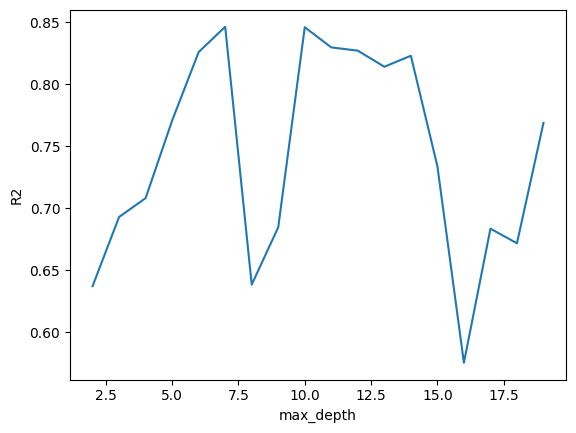

In [ ]:
# Visualization of which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
7,0.846377,0.958517
10,0.84601,0.986796
11,0.829736,0.9911
12,0.827102,0.995358
6,0.825985,0.942742


In [ ]:
# Run the model with our optimized value for max_depth
dec_tree_7 = DecisionTreeRegressor(max_depth = 7, random_state = 42)
dec_tree_7.fit(X_train, y_train)
train_7_score = dec_tree_7.score(X_train, y_train)
test_7_score = dec_tree_7.score(X_test, y_test)
print(train_7_score)
print(test_7_score)

0.958516936961625
0.8463768203632204


##Bagged Tree Model

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
## Create an instance of the model
bagreg = BaggingRegressor()
## Create a model pipeline
bagreg_pipe = make_pipeline(preprocessor, bagreg)
## Fit the model
bagreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb3f44b9310>)])),
                ('baggingregressor', BaggingRegressor())])

In [ ]:
# Model Performance
bagreg_train_pred = bagreg_pipe.predict(X_train)
bagreg_test_pred = bagreg_pipe.predict(X_test)

eval_regression(y_train, bagreg_train_pred, name='bagreg_train')
eval_regression(y_test, bagreg_test_pred, name='bagreg_test')

bagreg_train Scores
MAE: 1.0228 
MSE: 2.9449 
RMSE: 1.7161 
R2: 0.9668

bagreg_test Scores
MAE: 2.2749 
MSE: 13.8371 
RMSE: 3.7198 
R2: 0.8024



In [ ]:
# Review hyperparameters
bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bagreg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


array([24.28, 24.28, 24.28, 24.28, 24.54, 24.28, 23.33, 23.33, 24.54,
       24.28, 24.28, 24.28, 24.54, 24.28, 23.33, 24.54, 24.28, 24.54,
       24.28, 24.54, 24.28, 24.28, 24.61, 24.28, 24.54, 24.54, 24.28,
       24.54, 24.28, 23.78, 24.28, 24.28, 24.54, 24.48, 24.54, 24.48,
       24.28, 24.28, 24.28, 24.28, 23.33, 24.28, 23.59, 23.98, 24.28,
       24.54, 24.61, 24.28, 24.54, 24.28, 24.28, 24.28, 24.61, 24.28,
       23.85, 24.54, 24.48, 24.28, 24.28, 24.28, 24.28, 23.98, 23.85,
       24.23, 24.28, 23.85, 24.54, 24.28, 24.28, 24.54, 24.28, 24.54,
       24.48, 24.28, 24.28, 24.54, 24.28, 24.28, 24.54, 24.28, 23.98,
       24.54, 23.98, 24.54, 24.28, 23.85, 24.54, 23.33, 24.28, 23.85,
       24.28, 24.54, 24.61, 24.28, 24.54, 23.77, 24.54, 24.54, 24.48,
       24.54, 24.28, 24.28, 24.54, 23.57, 24.28, 24.54, 23.55, 24.28,
       24.28, 24.28, 24.48, 24.54, 24.28, 24.28, 23.85, 24.54, 24.28,
       24.61, 24.28, 24.28, 24.28, 24.28, 24.54, 24.28, 24.28, 23.85,
       24.28])

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

-0.0482660930206833
-0.13668546318894648


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BaggingRegressor was fitted without feature names
  warnings.warn(


In [ ]:
# List of estimator values
estimators = [10, 20, 30, 40, 50, 100]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_reg = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_reg.fit(X_train, y_train)
   train_score = bag_reg.score(X_train, y_train)
   test_score = bag_reg.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score


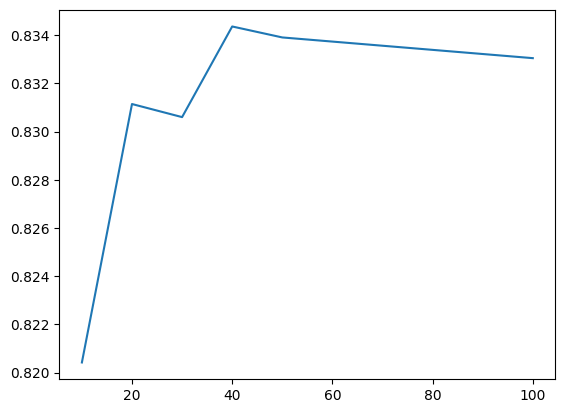

In [ ]:
# Plot the scores
plt.plot(scores['Test Score'])
plt.show()

In [ ]:
# Sort by test score
scores = scores.sort_values(by='Test Score', ascending=False)
scores


,Train Score,Test Score
40,0.97395,0.834365
50,0.975185,0.83391
100,0.977246,0.833051
20,0.9701,0.831147
30,0.973401,0.830604
10,0.960676,0.820421


In [ ]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators,random_state=42)
bag_reg_tuned.fit(X_train, y_train)
# Evaluate the model
print(bag_reg_tuned.score(X_train, y_train))
print(bag_reg_tuned.score(X_test, y_test))


0.9739496201366065
0.8343653587501565


##Random Forest Model

In [ ]:
rf = RandomForestRegressor(random_state = 42)

In [ ]:
## Create an instance of the model
rf_reg = RandomForestRegressor()
## Create a model pipeline
rf_reg_pipe = make_pipeline(preprocessor, rf_reg)
## Fit the model
rf_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb3f44b9310>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
# Model Performance
rf_train_pred = rf_reg_pipe.predict(X_train)
rf_test_pred = rf_reg_pipe.predict(X_test)

eval_regression(y_train, rf_train_pred, name='rf_reg_train')
eval_regression(y_test, rf_test_pred, name='rf_reg_test')

rf_reg_train Scores
MAE: 0.9669 
MSE: 2.2526 
RMSE: 1.5009 
R2: 0.9746

rf_reg_test Scores
MAE: 2.2102 
MSE: 12.4407 
RMSE: 3.5271 
R2: 0.8223



In [ ]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_reg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([25.904, 25.801, 25.904, 25.801, 23.991, 25.801, 25.369, 25.397,
       24.167, 25.806, 25.918, 25.942, 23.863, 25.801, 25.609, 23.991,
       25.904, 23.863, 25.721, 23.863, 25.839, 25.801, 24.751, 25.904,
       23.863, 24.039, 25.801, 23.863, 25.839, 25.667, 25.942, 25.942,
       23.863, 23.991, 24.167, 24.029, 25.715, 25.904, 25.808, 25.703,
       25.441, 25.801, 25.721, 25.815, 25.801, 23.863, 24.751, 25.801,
       24.167, 25.818, 25.918, 25.801, 24.751, 25.918, 24.733, 24.167,
       23.973, 25.801, 25.801, 25.627, 25.815, 25.715, 25.021, 24.84 ,
       25.801, 24.926, 23.863, 25.801, 25.715, 23.991, 25.627, 24.149,
       23.863, 25.801, 25.801, 23.863, 25.942, 25.801, 23.863, 25.686,
       25.815, 23.863, 25.801, 23.863, 25.681, 24.933, 23.991, 25.369,
       25.715, 25.275, 25.904, 23.863, 24.629, 25.801, 23.991, 24.726,
       23.863, 23.863, 23.863, 23.863, 25.801, 25.801, 23.863, 24.925,
       25.801, 23.863, 24.771, 25.73 , 25.904, 25.715, 23.863, 23.863,
      

In [ ]:
rf_reg_train_score = rf_reg.score(X_train, y_train)
rf_reg_test_score = rf_reg.score(X_test, y_test)
print(rf_reg_train_score)
print(rf_reg_test_score)


0.0008725911033282685
-0.12448461148073564


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
est_depths = [estimator.get_depth() for estimator in rf_reg.estimators_]
max(est_depths)


26

In [ ]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   model = RandomForestRegressor(max_depth=depth)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()


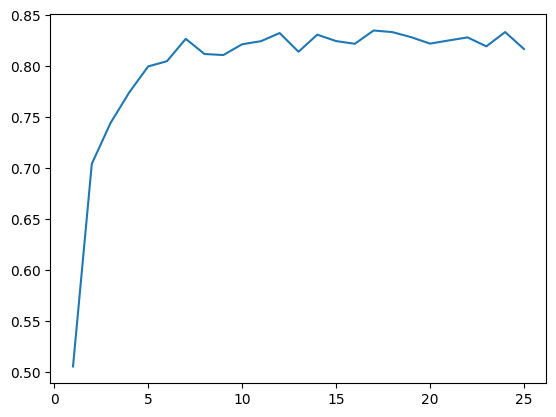

In [ ]:
plt.plot(scores['Test Score'])


In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
17,0.834918,0.973112
24,0.83337,0.976930
18,0.833306,0.977426
12,0.832377,0.975016
14,0.83081,0.972844


In [ ]:
# Save the index value of the best test score.
best_n_estimators = scores.index[0]
# Instantiate and fit the best version of the model
rf_reg_tuned = RandomForestRegressor(n_estimators=best_n_estimators,random_state=42)
rf_reg_tuned.fit(X_train, y_train)
# Evaluate the model
print(rf_reg_tuned.score(X_train, y_train))
print(rf_reg_tuned.score(X_test, y_test))

0.8542589954041552
0.801643845003815


## Recommendation:

Based on the tested model evaluations above, the random forest regression model seems to be the preferred model for predictions being close to it's true value. This model can be interpreted as saying that the model has tested out to have less errors compared to the alternate models.